# Big Mart Outlet Sales

# Project Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Train.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Exploratory Data Analysis

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
categorical_cols = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Establishment_Year','Outlet_Type']
for col in categorical_cols:
    print(df[col].value_counts(),'\n')

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64 

1985    1463
1987     

In [7]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'Low Fat':'LF','Regular':'reg','LF':'LF','reg':'reg','low fat':'LF'})
df['Item_Fat_Content'].value_counts()

LF     5517
reg    3006
Name: Item_Fat_Content, dtype: int64

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_23112\2283022279.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'],color = 'c')


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

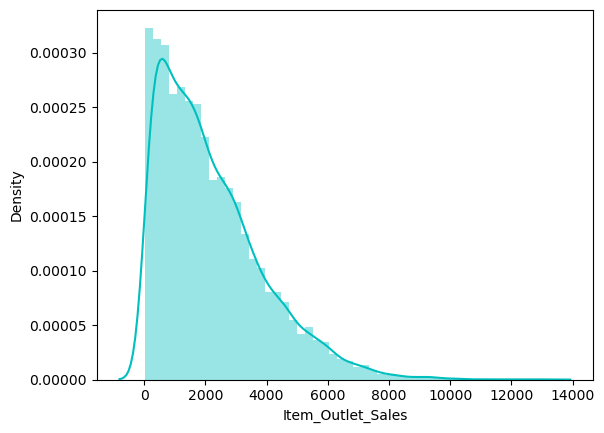

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['Item_Outlet_Sales'],color = 'c')

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_23112\3329567677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

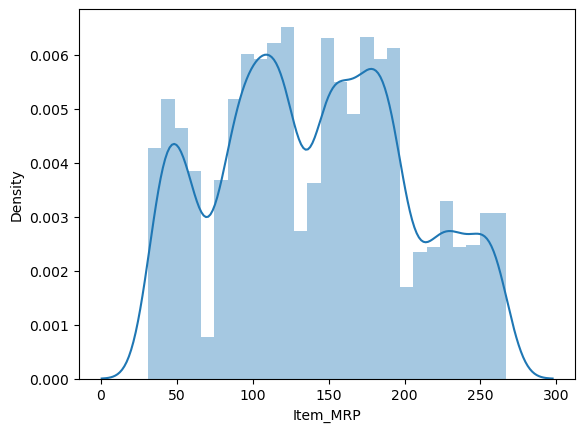

In [9]:
sns.distplot(df['Item_MRP'])

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_23112\4244379489.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')


<Axes: >

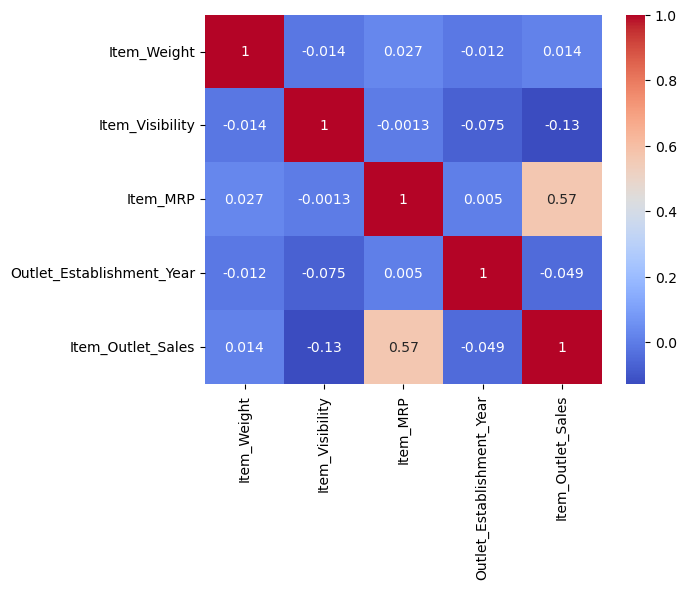

In [10]:
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')

Text(0.5, 1.0, 'Item_MRP vs. Item_Outlet_Sales')

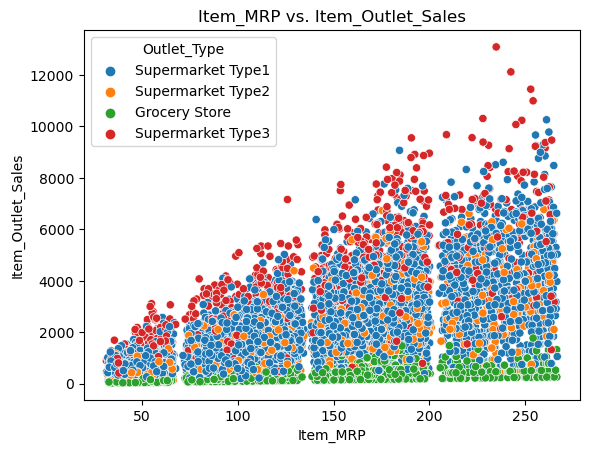

In [11]:
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = df,hue = 'Outlet_Type')
plt.title('Item_MRP vs. Item_Outlet_Sales')

Text(0, 0.5, 'Outlet_Sales')

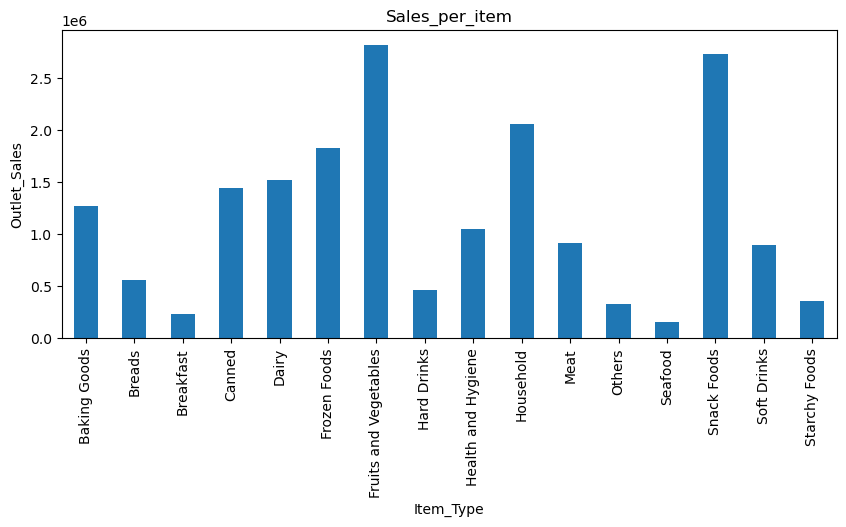

In [12]:
sales_per_item = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
sales_per_item.plot(kind = 'bar',figsize = (10,4))
plt.title('Sales_per_item')
plt.ylabel('Outlet_Sales')

Text(0, 0.5, 'Avg Item Outlet Sales')

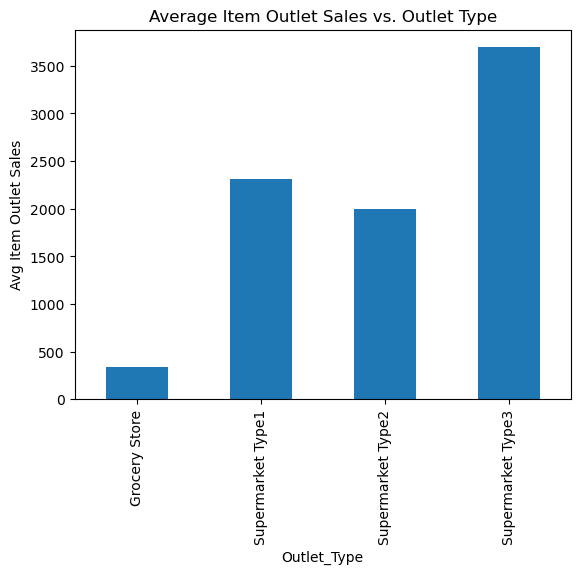

In [13]:
avg_sales_per_year = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
avg_sales_per_year.plot(kind = 'bar')
plt.title('Average Item Outlet Sales vs. Outlet Type')
plt.ylabel('Avg Item Outlet Sales')

Text(0.5, 1.0, 'Item_Weight vs. Item_Outlet_Sales')

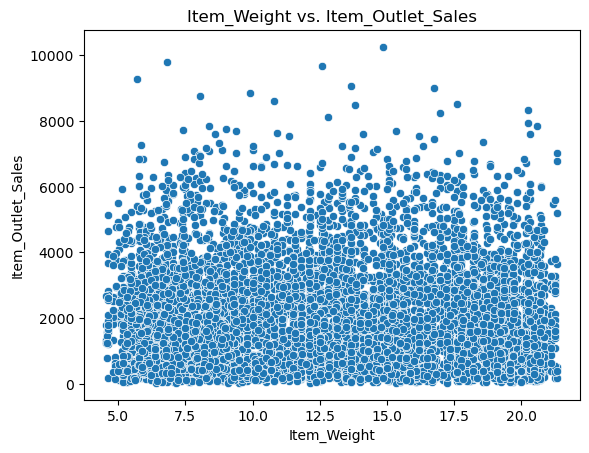

In [14]:
sns.scatterplot(x = 'Item_Weight',y = 'Item_Outlet_Sales', data = df)
plt.title('Item_Weight vs. Item_Outlet_Sales')

Text(0.5, 1.0, 'Outlet_Type vs. Item_Outlet_Sales')

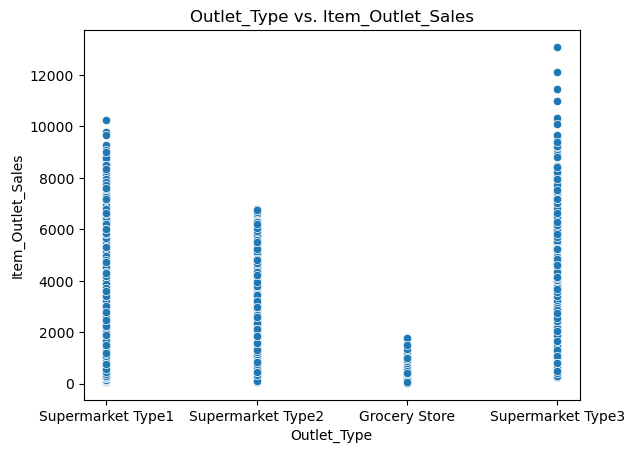

In [15]:
sns.scatterplot(y = 'Item_Outlet_Sales',x = 'Outlet_Type',data = df)
plt.title('Outlet_Type vs. Item_Outlet_Sales')

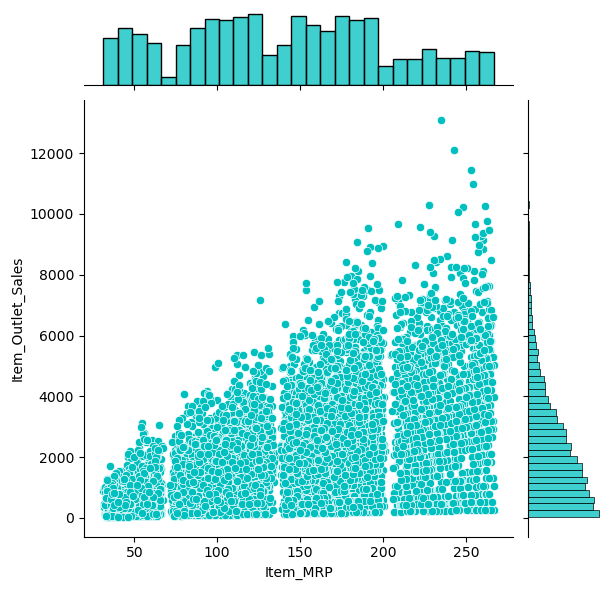

In [16]:
sns.jointplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales',color='c')

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

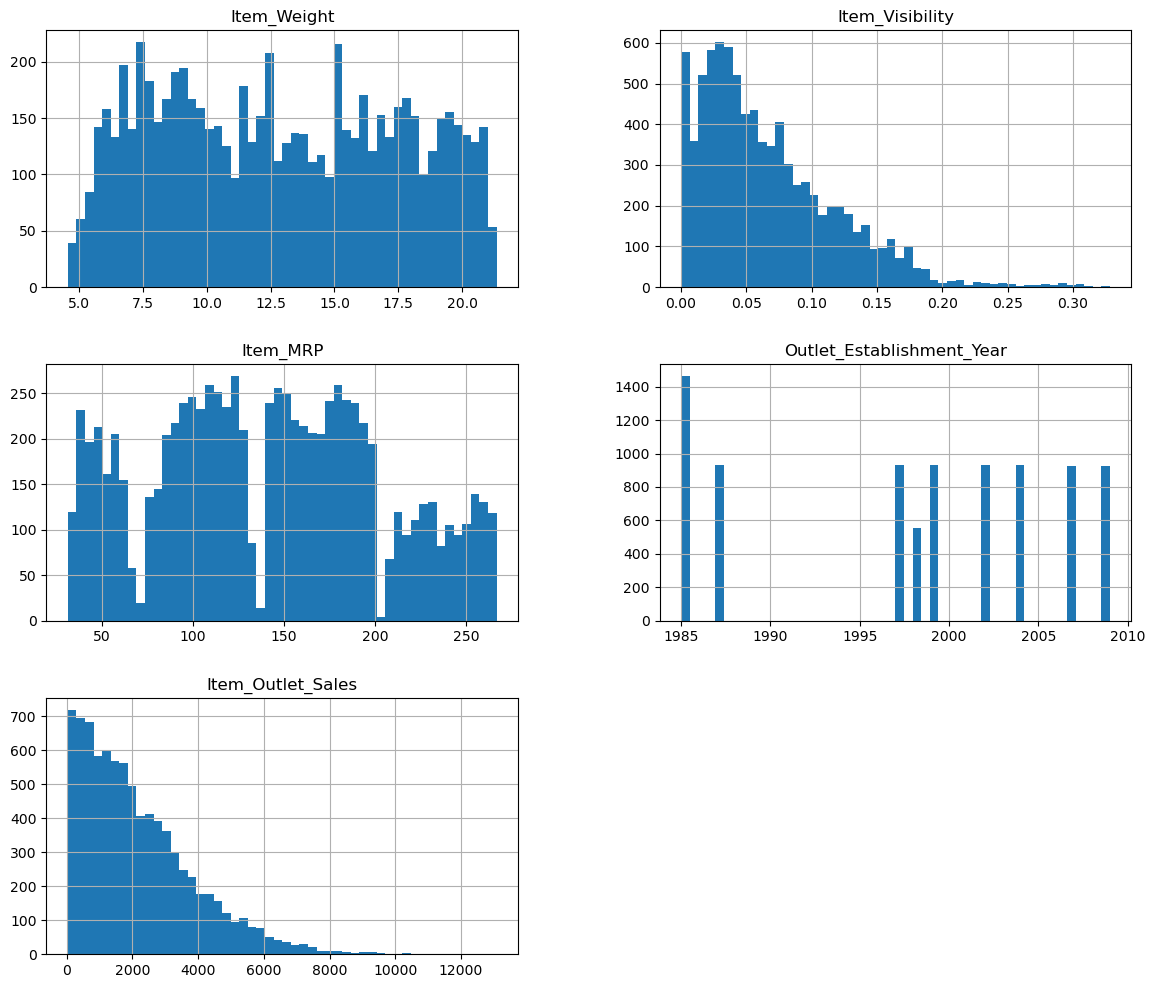

In [17]:
df.hist(bins = 50, figsize=(14,12))

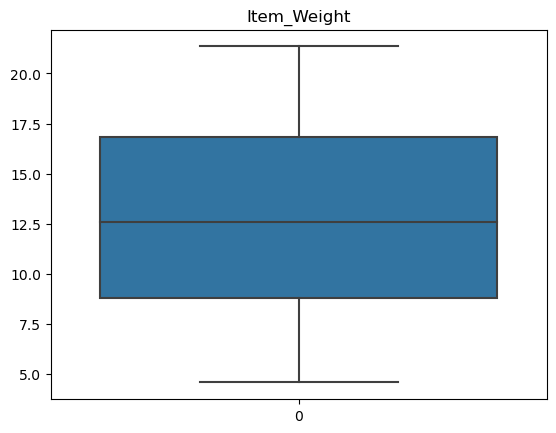

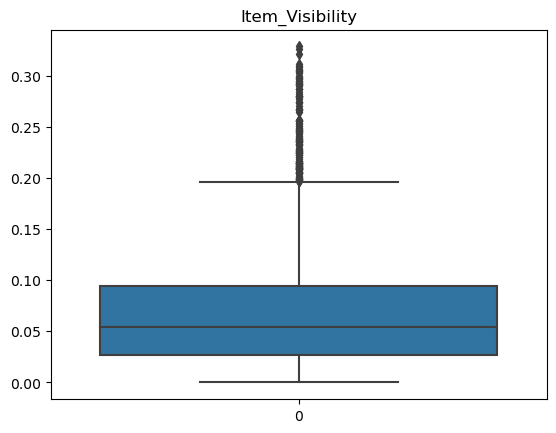

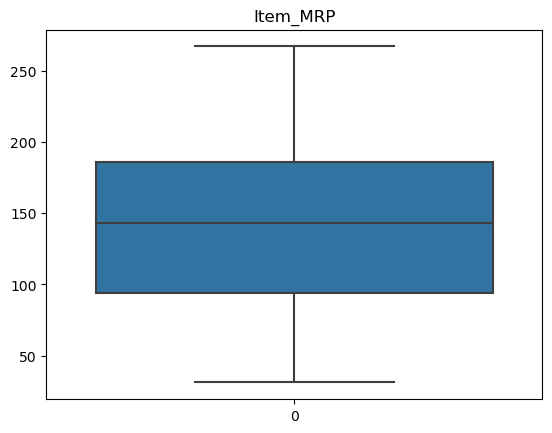

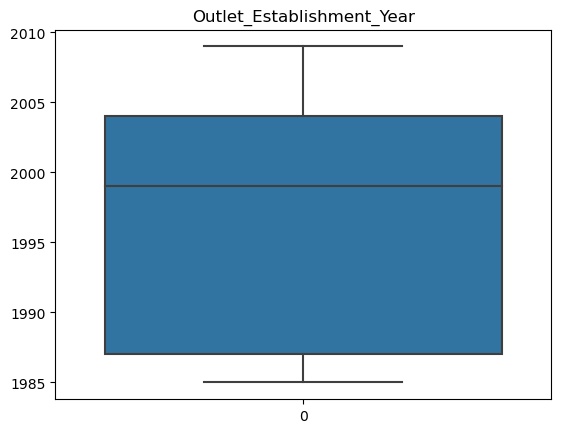

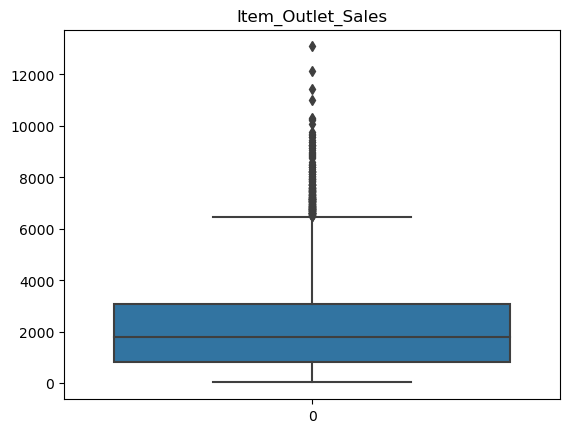

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
    if df[i].dtypes != object:
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

# Handling Outliers

In [19]:
import numpy as np

def remove_outliers_iqr(data):
    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = (data < lower_bound) | (data > upper_bound)
 
    cleaned_data = data[~outliers]
    
    return cleaned_data
df['Item_Visibility'] = remove_outliers_iqr(df['Item_Visibility'])

# Dealing with null values

In [20]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               144
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
df['Item_Weight'] = df['Item_Weight'].fillna(method='bfill', axis = 0).fillna(df['Item_Weight'].mean())
df['Item_Visibility'] = df['Item_Visibility'].fillna(method= 'bfill',axis = 0).fillna(df['Item_Visibility'].median())


In [22]:
df.duplicated().sum()

0

Converting Categorical To Numerical

In [23]:
from sklearn.preprocessing import LabelEncoder
cols = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
encoder = LabelEncoder()
for i in cols:
    df[i] = encoder.fit_transform(df[i])

<Axes: >

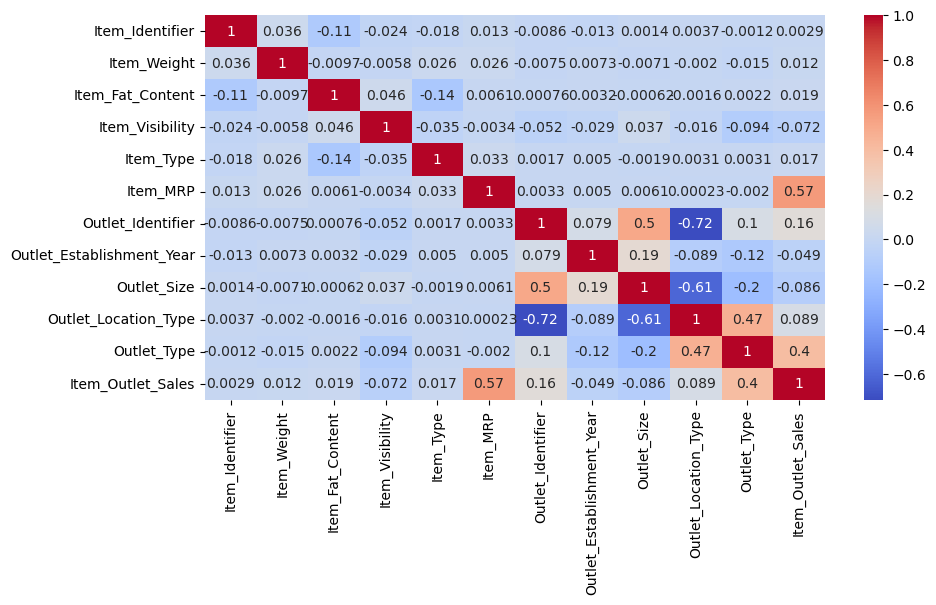

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot= True,cmap = 'coolwarm')

In [25]:
x = df[['Item_MRP','Outlet_Size','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Item_Type','Item_Visibility']]
y = df['Item_Outlet_Sales']

# Data scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Seperating Training And Test Data

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# RandomForestRegressor Model

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

regressor = RandomForestRegressor(n_estimators = 500,max_depth=5, min_samples_leaf=5,min_samples_split = 7)
regressor.fit(x_train, y_train)

rf_pred = regressor.predict(x_test)
mean_squared_error(y_test,rf_pred)

1038350.7511463355

In [29]:
print('train_score :',regressor.score(x_train,y_train))
print('test_score :',regressor.score(x_test,y_test))

train_score : 0.6067877123051965
test_score : 0.6179682904165111


# LinearRegression

In [30]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression(fit_intercept= True,copy_X= True,positive=False)
lmodel.fit(x_train,y_train)
l_pred = lmodel.predict(x_test)
mean_squared_error(y_test,l_pred)

1290793.2115313327

In [31]:
print('train_score :',lmodel.score(x_train,y_train))
print('test_score :',lmodel.score(x_test,y_test))

train_score : 0.5048734473957239
test_score : 0.5250892467928878


# Ridge Linear model

In [32]:
from sklearn.linear_model import Ridge
r_model = Ridge(alpha=9,solver='sag',fit_intercept=True,copy_X= True,positive=False)
r_model.fit(x_train,y_train)
r_pred = r_model.predict(x_test)
mean_squared_error(y_test,r_pred)

1291764.2794532708

In [33]:
print('train_score :',r_model.score(x_train,y_train))
print('test_score :',r_model.score(x_test,y_test))

train_score : 0.5046361870336797
test_score : 0.5247319698920618


# XGBoost model

In [34]:
import xgboost as xgb

model = xgb.XGBRegressor(max_depth= 2,n_estimators = 30,subsample = 0.7)

model.fit(x_train, y_train)

xg_pred = model.predict(x_test)

mse = mean_squared_error(y_test, xg_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1052531.0947938187


In [35]:
print('train_score :',model.score(x_train,y_train))
print('test_score :',model.score(x_test,y_test))

train_score : 0.6098436046235178
test_score : 0.6127510351488199


# GradientBoosting model

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.05,n_estimators=100,max_depth=2,min_samples_leaf=5,subsample=0.9,max_features='auto')
gbr.fit(x_train,y_train)
gb_pred = gbr.predict(x_test)
mean_squared_error(gb_pred,y_test)

C:\Users\VIVEK\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\VIVEK\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\VIVEK\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\VIVEK\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\VIVEK\a

1045959.5013648156

In [37]:
print('train_score :',gbr.score(x_train,y_train))
print('test_score :',gbr.score(x_test,y_test))

train_score : 0.6018108804067663
test_score : 0.6151688665700406


# Final Predictions On The Test Dataset using RandomForestRegressor model

In [38]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [39]:
import numpy as np

def remove_outliers_iqr(data):
    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = (data < lower_bound) | (data > upper_bound)
 
    cleaned_data = data[~outliers]
    
    return cleaned_data
test_df['Item_Visibility'] = remove_outliers_iqr(test_df['Item_Visibility'])

# 
test_df['Outlet_Size'] = test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0])
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(method='bfill', axis = 0).fillna(test_df['Item_Weight'].mean())
test_df['Item_Visibility'] = test_df['Item_Visibility'].fillna(method= 'bfill',axis = 0).fillna(test_df['Item_Visibility'].median())

# 
cols = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
encoder = LabelEncoder()
for i in cols:
    test_df[i] = encoder.fit_transform(test_df[i])
    
#     
test_data = test_df[['Item_MRP','Outlet_Size','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Item_Type','Item_Visibility']]

In [40]:
test_df['Predicted_Item_Outlet_Sales'] = regressor.predict(test_data)

C:\Users\VIVEK\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [41]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_Item_Outlet_Sales
0,1103,20.750,1,0.007565,13,107.8622,9,1999,1,0,1,6216.312737
1,1067,8.300,4,0.038428,4,87.3198,2,2007,1,1,1,6213.869546
2,1406,14.600,1,0.099575,11,241.7538,0,1998,1,2,0,526.696556
3,809,7.315,1,0.015388,13,155.0340,2,2007,1,1,1,6209.827994
4,1184,9.800,2,0.118599,4,234.2300,5,1985,1,2,3,6083.791508


# Saving the model

In [42]:
from joblib import dump
dump(regressor,'RFRegressor.joblib')

['RFRegressor.joblib']

In [43]:
from joblib import load
load('RFRegressor.joblib')

RandomForestRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=7,
                      n_estimators=500)